In [1]:
import aes2_added_fb_prize_as_features_preprocessing

CUDA_AVAILABLE = True


2024-06-12 07:20:17.235626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 07:20:17.235733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 07:20:17.372173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import gc

gc.collect()

751

In [3]:
import pickle

with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/train_feats.pickle", "rb") as f:
    train_feats = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/X.pickle", "rb") as f:
    X = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y.pickle", "rb") as f:
    y = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y_split.pickle", "rb") as f:
    y_split = pickle.load(f)
with open(
    "/kaggle/input/aes2-eval-added-fb-prize-as-features-8168c5/feature_select.pickle", "rb"
) as f:
    feature_select = pickle.load(f)
    
aes2_added_fb_prize_as_features_preprocessing.feature_select = feature_select

In [4]:
train_feats.iloc[:5, -7:]

,deberta_oof_5,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0.000270,2.838330,2.648617,3.225708,2.852826,2.682580,2.372594
1,0.000090,3.301917,3.215416,3.436492,3.428899,3.493132,2.969440
2,0.006177,4.223053,4.069751,4.395761,4.302904,4.315377,4.023932
3,0.000235,3.695875,3.485972,4.000536,3.655286,3.484632,3.629644
4,0.000375,3.449726,3.228402,3.503447,3.219933,3.524052,3.082691


In [5]:
import numpy as np

X = train_feats[feature_select].astype(np.float32).values

In [6]:
import catboost as cb 

In [7]:
class QWKObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        labels = np.array(targets) + a
        preds = np.array(approxes) + a
        preds = preds.clip(1, 6)
        f = 1/2 * np.sum((preds - labels)**2)
        g = 1/2 * np.sum((preds - a)**2 + b)
        df = preds - labels
        dg = preds - a
        grad = (df / g - f * dg / g**2) * len(labels)
        hess = (1 / g - (2 * df * dg) / (g**2) + (2 * f * dg**2) / (g**3)) * len(labels)
        return list(zip(grad, hess))

# Custom QWK Metric
class QWKMetric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, targets, weight):
        approxes = approxes[0]
        targets = np.array(targets) + a
        approxes = np.array(approxes) + a
        approxes = approxes.clip(1, 6).round()
        qwk = cohen_kappa_score(targets, approxes, weights="quadratic")
        return qwk, 0


In [8]:
loadfrom = "/kaggle/input/modelss/"
import optuna

In [9]:
X.shape

(17307, 13000)

fold 1
traininf catboost for fold1


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [07:25:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


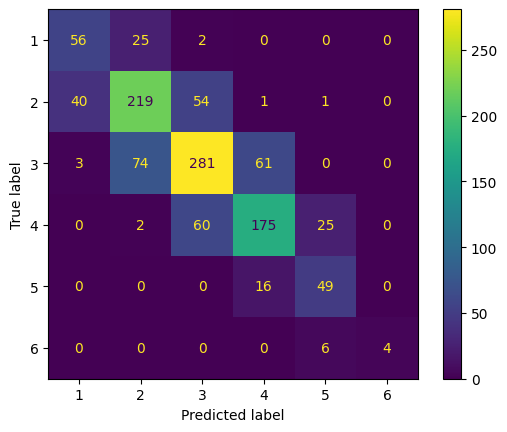

F1 score across fold: 0.6796630581872033
Cohen kappa score across fold: 0.8441071921833825
fold 2
traininf catboost for fold2


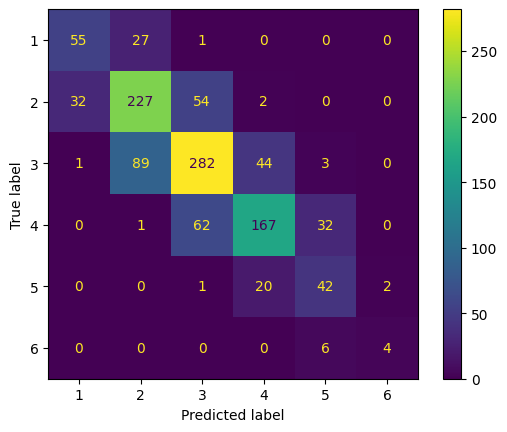

F1 score across fold: 0.6738477381612927
Cohen kappa score across fold: 0.8424009935630689
fold 3
traininf catboost for fold3


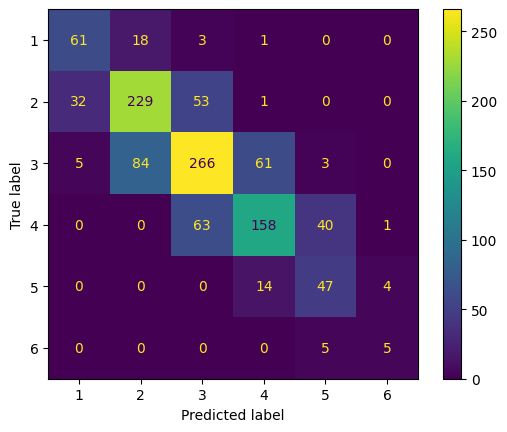

F1 score across fold: 0.6640317868117592
Cohen kappa score across fold: 0.8376646265468249
fold 4
traininf catboost for fold4


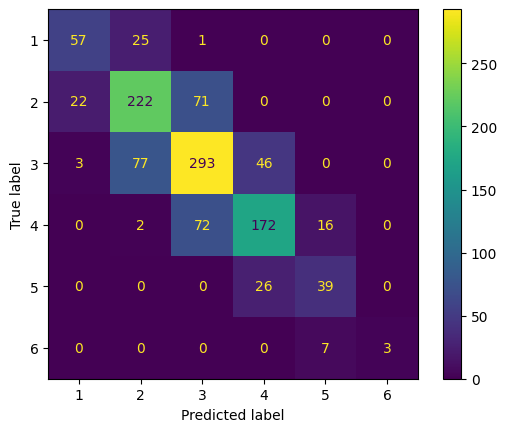

F1 score across fold: 0.6802684477801483
Cohen kappa score across fold: 0.8405252195157229
fold 5
traininf catboost for fold5


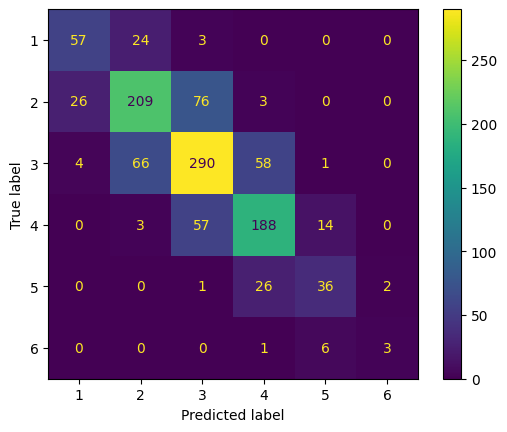

F1 score across fold: 0.6774675686444656
Cohen kappa score across fold: 0.8292317005206475
fold 6
traininf catboost for fold6


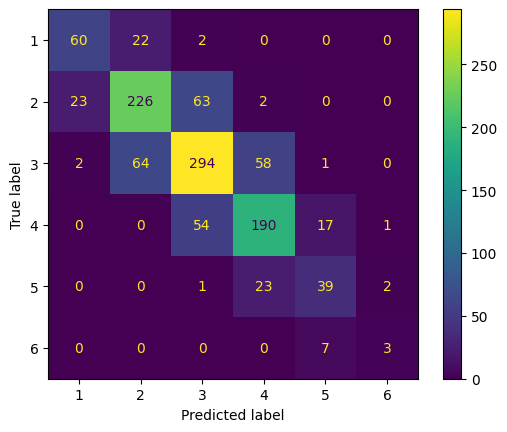

F1 score across fold: 0.7030134354855367
Cohen kappa score across fold: 0.851833938881926
fold 7
traininf catboost for fold7


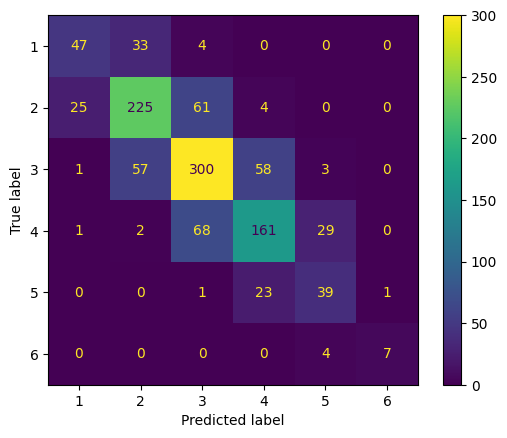

F1 score across fold: 0.6748435059085423
Cohen kappa score across fold: 0.8283360014347272
fold 8
traininf catboost for fold8


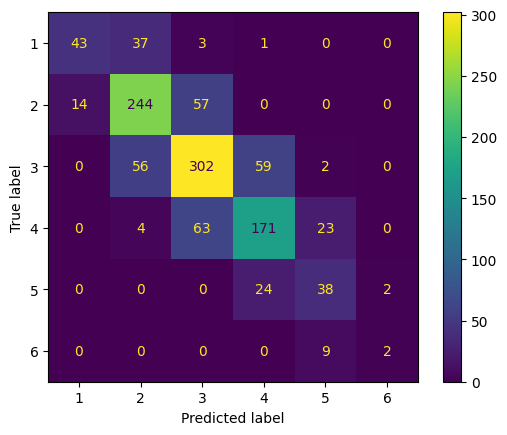

F1 score across fold: 0.6907303316493103
Cohen kappa score across fold: 0.8386125393756413
fold 9
traininf catboost for fold9


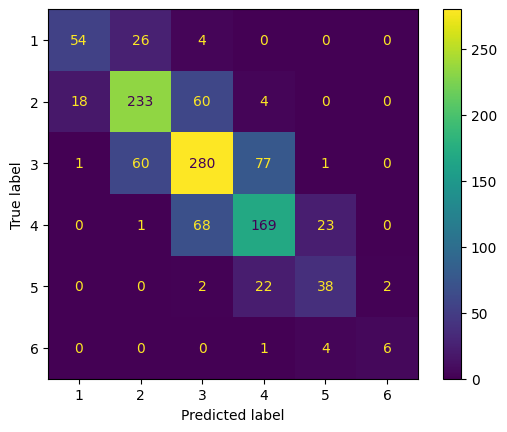

F1 score across fold: 0.6760783936893505
Cohen kappa score across fold: 0.8325341392948813
fold 10
traininf catboost for fold10


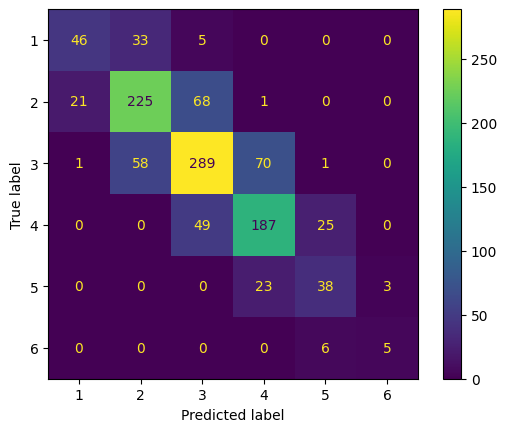

F1 score across fold: 0.6841063108430815
Cohen kappa score across fold: 0.8440050475595217
fold 11
traininf catboost for fold11


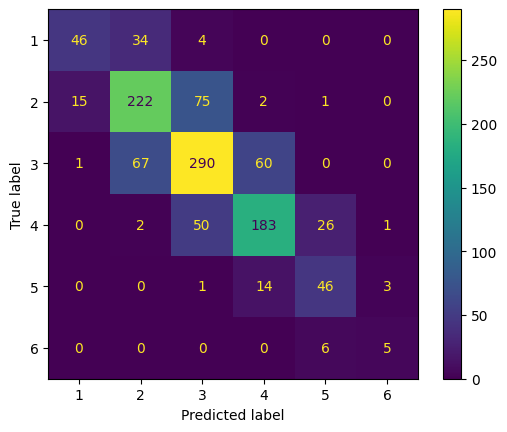

F1 score across fold: 0.6858745240220379
Cohen kappa score across fold: 0.8385727148588411
fold 12
traininf catboost for fold12


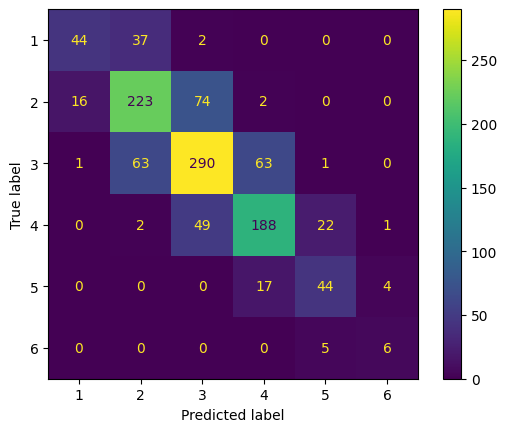

F1 score across fold: 0.6882209897206882
Cohen kappa score across fold: 0.8452285485164395
fold 13
traininf catboost for fold13


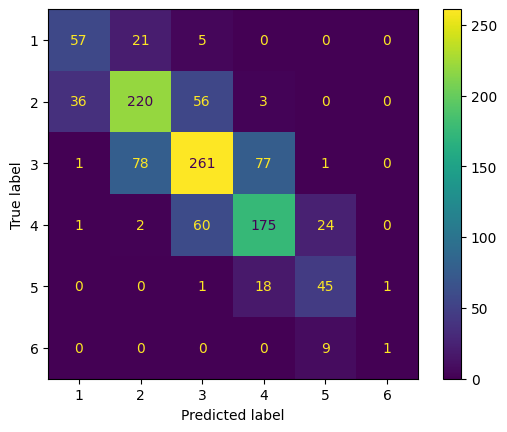

F1 score across fold: 0.6567041299915359
Cohen kappa score across fold: 0.827695789149443
fold 14
traininf catboost for fold14


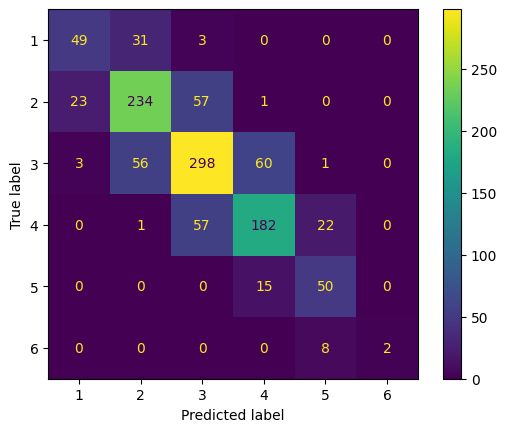

F1 score across fold: 0.7053223717754161
Cohen kappa score across fold: 0.8526022138825602
fold 15
traininf catboost for fold15


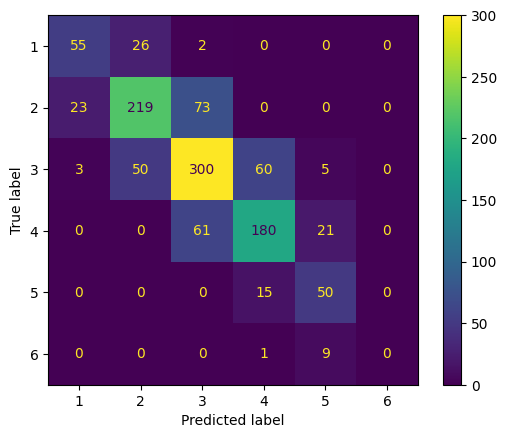

F1 score across fold: 0.6946627493345493
Cohen kappa score across fold: 0.8453959192155189
Mean F1 score: 0.6823223561336612
Mean Cohen kappa score: 0.8399164389666098


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score
from aes2_added_fb_prize_as_features_preprocessing import *
import joblib
n_splits = 15
models = []
predictions = []
f1_scores = []
kappa_scores = []


class Predictor:
    def __init__(self, models: list, weights):
        self.models = models
        self.weights = weights
    def predict(self, X):
        n_models = len(self.models)
        predicted = 0  # Initialize to zero

        for i, model in enumerate(self.models):
            # Accumulate the weighted predictions
            predicted += self.weights[i] * model.predict(X)      
        return predicted


skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
xgboost_best_iters = []
light_best_iters = []
cat_best_iters = []
weights_list = []
for i, (train_index, test_index) in enumerate(skf.split(X, y_split), 1):
    # Split the data into training and testing sets for this fold
    print('fold',i)
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]
    
    print(f"traininf catboost for fold{i}")
    cat_reg = cb.CatBoostRegressor(
        loss_function=QWKObjective(),
        eval_metric=QWKMetric(),
        learning_rate=0.05,
        depth=5,
        l2_leaf_reg=0.1,
        iterations=700,
        random_seed=412,
        verbose=25,
        early_stopping_rounds=75
    )
    if loadfrom:
        cat_reg = joblib.load(loadfrom+f'catboost_fold_{i}.joblib')
    else:
        cat_reg.fit(X_train_fold,
                    y_train_fold,
                    eval_set = [(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)]
                   )
        cat_best_iters.append(cat_reg.get_best_iteration())
        joblib.dump(cat_reg, f'catboost_fold_{i}.joblib')

    
    callbacks = [log_evaluation(period=25), early_stopping(stopping_rounds=75,first_metric_only=True)]
    light = lgb.LGBMRegressor(
            objective = qwk_obj,
            metrics = 'None',
            learning_rate = 0.05,
            max_depth = 8,
            num_leaves = 10,
            colsample_bytree=0.3,
            reg_alpha = 0.7,
            reg_lambda = 0.1,
            n_estimators=700,
            random_state=42,
            extra_trees=True,
            class_weight='balanced',
            device='gpu' if CUDA_AVAILABLE else 'cpu',
            verbosity = - 1
        )

    # Fit the model on the training data for this fold  
    if loadfrom:
        light = joblib.load(loadfrom+f'lightgbm_fold_{i}.joblib')
    else:
        light.fit(
            X_train_fold,
            y_train_fold,
            eval_names=['train', 'valid'],
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=callbacks
        )
        light_best_iters.append(light.best_iteration_)
        joblib.dump(light, f'lightgbm_fold_{i}.joblib')

    xgb_callbacks = [
        xgb.callback.EvaluationMonitor(period=25),
        xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True)
    ]
    xgb_regressor = xgb.XGBRegressor(
        objective = qwk_obj,
        metrics = 'None',
        learning_rate = 0.1,
        max_depth = 8,
        num_leaves = 10,
        colsample_bytree=0.5,
        reg_alpha = 0.1,
        reg_lambda = 0.8,
        n_estimators=1024,
        random_state=42,
        extra_trees=True,
        class_weight='balanced',
        tree_method="hist",
        device="gpu" if CUDA_AVAILABLE else "cpu"
    #             device='gpu',
    #             verbosity = 1
    )
    
    xgb_callbacks = [
        xgb.callback.EvaluationMonitor(period=25),
        xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True)
    ]
    if loadfrom:
        xgb_regressor = joblib.load(loadfrom+f'xgboost_fold_{i}.joblib')
    else:
        xgb_regressor.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=xgb_callbacks
        )
        joblib.dump(xgb_regressor, f'xgboost_fold_{i}.joblib')
        xgboost_best_iters.append(xgb_regressor.get_booster().best_iteration)
    #weights = [0.6,0.2,0.2]
    #predictor = Predictor([light, xgb_regressor,cat_reg],weights)
        
    best_params = {'w_light': 0.3606507423929457, 'w_xgb': 0.1366980400289592}

    best_weights = [best_params["w_light"], best_params["w_xgb"], 1 - best_params["w_light"] - best_params["w_xgb"]]
    predictor = Predictor([light, xgb_regressor, cat_reg], best_weights)
    
    weights_list.append(best_weights)
    models.append(predictor)
    
    # Make predictions on the test data for this fold
    predictions_fold = predictor.predict(X_test_fold)
    predictions_fold = predictions_fold + a
    predictions_fold = predictions_fold.clip(1, 6).round()
    predictions.append(predictions_fold)

    # Calculate and store the F1 score and Cohen's kappa score for this fold
    f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')
    kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
    f1_scores.append(f1_fold)
    kappa_scores.append(kappa_fold)

    # Plot confusion matrix
    cm = confusion_matrix(y_test_fold_int, predictions_fold, labels=[x for x in range(1, 7)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(1, 7)])
    disp.plot()
    plt.show()

    print(f'F1 score across fold: {f1_fold}')
    print(f'Cohen kappa score across fold: {kappa_fold}')

    gc.collect()

# Summary of results
print("Mean F1 score:", np.mean(f1_scores))
print("Mean Cohen kappa score:", np.mean(kappa_scores))


In [11]:
print("the average weights for classes are = ",np.array(weights_list).mean(axis=0))

the average weights for classes are =  [0.36065074 0.13669804 0.50265122]


In [12]:
mean_f1_score = np.mean(f1_scores)
mean_kappa_score = np.mean(kappa_scores)
# Print the mean scores
print(f'Mean F1 score across {n_splits} folds: {mean_f1_score}')
print(f'Mean Cohen kappa score across {n_splits} folds: {mean_kappa_score}')
#print(f"XGBoost mean best iters: {sum(xgboost_best_iters)/len(xgboost_best_iters)}")
#print(f"LightBoost mean best iters: {sum(light_best_iters)/len(light_best_iters)}")

Mean F1 score across 15 folds: 0.6823223561336612
Mean Cohen kappa score across 15 folds: 0.8399164389666098


In [13]:

from aes2_added_fb_prize_as_features_preprocessing import preprocess_test, infer

test_feats = preprocess_test()
infer(test_feats, models)


/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/aes2_added_fb_prize_as_features_preprocessing.py:264: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  tmp = tmp.with_columns(pl.col('paragraph').map_elements(dataPreprocessing))
/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/aes2_added_fb_prize_as_features_preprocessing.py:265: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  tmp = tmp.with_columns(pl.col('paragraph').map_elements(remove_punctuation).alias('paragraph_no_pinctuation'))
/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/aes2_added_fb_prize_as_features_preprocessing.py:266: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results.

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


tokenizers.__version__: 0.15.2
transformers.__version__: 4.39.3


Model: microsoft/deberta-v3-large Score: 0.4569  Scores: [0.4881251563991662, 0.45350791183634237, 0.4167653497073674, 0.4555629168241569, 0.47309887903749326, 0.4544346186864903]


0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
CustomModel(
  (model): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(i

  0%|          | 0/1 [00:00<?, ?it/s]

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close

Features number:  21911
[2. 3. 4.]


,essay_id,score
0,000d118,2
1,000fe60,3
2,001ab80,4
